In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import lorem
import itertools as itr

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape) # image data shape
print(digits.target.shape) # label data shape

(1797, 64)
(1797,)


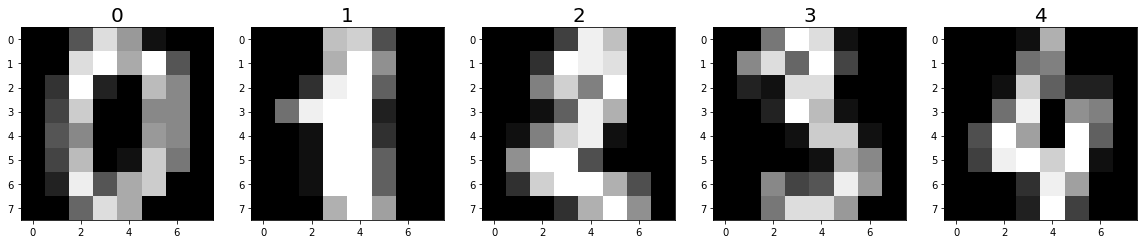

In [6]:
plt.figure(figsize=(20,4))
for ind, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, ind+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize=20)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
#x_scaled = preprocessing.scale(x_train)
#y_scaled = preprocessing.scale(y_train)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(x_train, y_train) # x_train is digits, y_train is labels

# predict
logreg.predict(x_test[0].reshape(1,-1))

array([2])

In [18]:
score = logreg.score(x_test, y_test)
print(score)

0.9533333333333334


In [92]:
type(x_train)

numpy.ndarray

## MNIST Dataset

In [21]:
from sklearn.datasets import fetch_openml

(70000, 784)
(70000,)


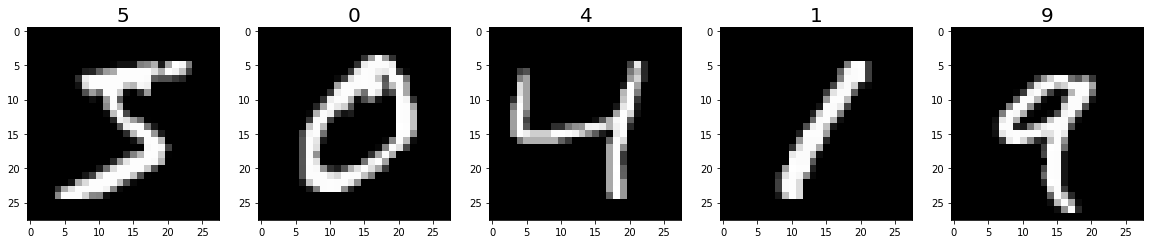

In [23]:

plt.figure(figsize=(20,4))
for ind, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
    plt.subplot(1, 5, ind+1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title(label, fontsize=20)

Sparsity with L1 penalty: 80.61%
Test score with L1 penalty: 0.9533
Example run in 31.660 s


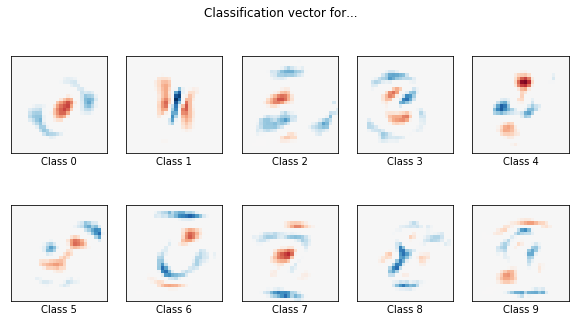

In [82]:
import time

t0 = time.time()
train_samples = 5000

# get dataset
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)


random_state = sklearn.utils.check_random_state(0)
permutation = random_state.permutation(x.shape[0])
x = x[permutation]
y = y[permutation]
x = x.reshape((x.shape[0], -1))

# split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_samples, test_size=10000)

# preprocessing data
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# fit into model
clf = LogisticRegression(C=50. / train_samples, penalty='l1', solver='saga', tol=0.1)
clf.fit(x_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100

# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

# print run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


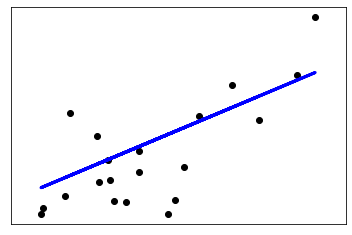

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()